In [127]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

In [128]:
def setup_driver(url):
    driver = webdriver.Chrome()
    time.sleep(3)
    driver.get(url)
    return driver

In [129]:
def find_element(driver):
    drop_amount = driver.find_element(By.ID, "buffonDropAmountBox")
    drop_buttom = driver.find_element(By.ID, "buffonDropAmount")
    needle_scale_input = driver.find_element(By.ID, "buffonScaleBox")
    start_over_button = driver.find_element(By.ID, "buffonReset")
    return drop_amount, drop_buttom, needle_scale_input, start_over_button

In [130]:
def set_params(drop_amount, needle_scale_input, drop_num, needle_scale):
    drop_amount.clear()
    needle_scale_input.clear()
    drop_amount.send_keys(str(drop_num))
    needle_scale_input.send_keys(str(needle_scale))
    return

In [131]:
def get_result(driver):
    needle_scale = driver.find_element(By.ID, "buffonNumScale").text
    extent = driver.find_element(By.ID, "buffonNumExtent").text
    number_of_drops = driver.find_element(By.ID, "buffonNumDrops").text
    number_of_hits = driver.find_element(By.ID, "buffonNumHits").text
    drops_per_hits = driver.find_element(By.ID, "buffonNumRatio").text
    pi = driver.find_element(By.ID, "buffonNumPi").text
    return float(needle_scale), float(extent), int(number_of_drops), int(number_of_hits), float(drops_per_hits), float(pi)

In [132]:
def drop_simulate(driver, drop_amount, drop_num, needle_scale_input, needle_scale, drop_buttom):
    set_params(drop_amount, needle_scale_input, drop_num, needle_scale)
    drop_buttom.submit()
    #!
    time.sleep(drop_num * 0.00005 if drop_num * 0.00005 > 0.5 else 0.5)
    needle_scale_output, extent, number_of_drops, number_of_hits, drops_per_hits, pi = get_result(driver)
    return needle_scale_output, extent, number_of_drops, number_of_hits, drops_per_hits, pi

In [133]:
def create_df():
    df = pd.DataFrame(columns=['needle_scale', 'extent', 'number_of_drops', 'number_of_hits', 'drops_per_hits', 'pi'])
    return df

def add_data(df, needle_scale, extent, number_of_drops, number_of_hits, drops_per_hits, pi):
    new_row = pd.DataFrame([[needle_scale, extent, number_of_drops, number_of_hits, drops_per_hits, pi]],
                            columns=['needle_scale', 'extent', 'number_of_drops', 'number_of_hits', 'drops_per_hits', 'pi'])
    df = pd.concat([df, new_row], ignore_index=True)
    return df

In [134]:
100000 * 0.00005

5.0

In [147]:
# def main():
url = "https://mste.illinois.edu/activity/buffon/"
driver = setup_driver(url)
drop_amount, drop_buttom, needle_scale_input, start_over_button = find_element(driver)

df = create_df()

drop_amount_list = [100, 1000, 10000, 100000]#, 1000000]
needle_scale_list = [0.5]#, 1
simulate_times = 10

for drop_num in drop_amount_list:
    for needle_scale in needle_scale_list:
        for _ in range(simulate_times):
            start_over_button.submit()
            needle_scale_output, extent, number_of_drops, number_of_hits, drops_per_hits, pi = drop_simulate(driver, drop_amount, drop_num, needle_scale_input, needle_scale, drop_buttom)
            df = add_data(df, needle_scale_output, extent, number_of_drops, number_of_hits, drops_per_hits, pi)

driver.close()
    
    # return df
df

,needle_scale,extent,number_of_drops,number_of_hits,drops_per_hits,pi
0,1.0,1.0,100,57,1.754386,3.508772
1,1.0,1.0,100,70,1.428571,2.857143
2,1.0,1.0,100,66,1.515152,3.030303
3,1.0,1.0,100,67,1.492537,2.985075
4,1.0,1.0,100,63,1.587302,3.174603
5,1.0,1.0,100,63,1.587302,3.174603
6,1.0,1.0,100,65,1.538462,3.076923
7,1.0,1.0,100,60,1.666667,3.333333
8,1.0,1.0,100,61,1.639344,3.278689
9,1.0,1.0,100,64,1.562500,3.125000


In [144]:
df

,needle_scale,extent,number_of_drops,number_of_hits,drops_per_hits,pi
0,1.0,1.0,1,1,1.000000,2.000000
1,1.0,1.0,1,1,1.000000,2.000000
2,1.0,1.0,1,1,1.000000,2.000000
3,1.0,1.0,1,1,1.000000,2.000000
4,1.0,1.0,1,1,1.000000,2.000000
...,...,...,...,...,...,...
1195,1.0,1.0,100000,63517,1.574382,3.148763
1196,1.0,1.0,100000,63681,1.570327,3.140654
1197,1.0,1.0,100000,63470,1.575548,3.151095
1198,1.0,1.0,100000,63402,1.577237,3.154475


In [145]:
df['number_of_drops'].value_counts()

1         200
10        200
100       200
1000      200
10000     200
100000    200
Name: number_of_drops, dtype: int64

In [138]:
df.to_csv('buffon_needle_data2.csv', index=False)

In [146]:
df.needle_scale.unique()

array([1.])

In [139]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '10'}>],
       [<Axes: title={'center': '100'}>,
        <Axes: title={'center': '1000'}>],
       [<Axes: title={'center': '10000'}>,
        <Axes: title={'center': '100000'}>]], dtype=object)

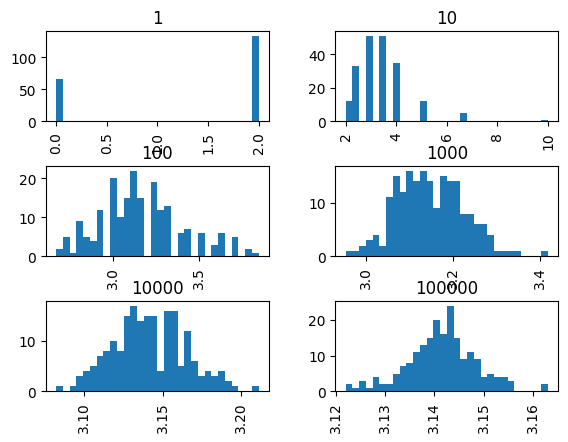

In [140]:
df['pi'][df['needl']].hist(by=df['number_of_drops'], bins=30)

<Axes: xlabel='number_of_drops', ylabel='pi'>

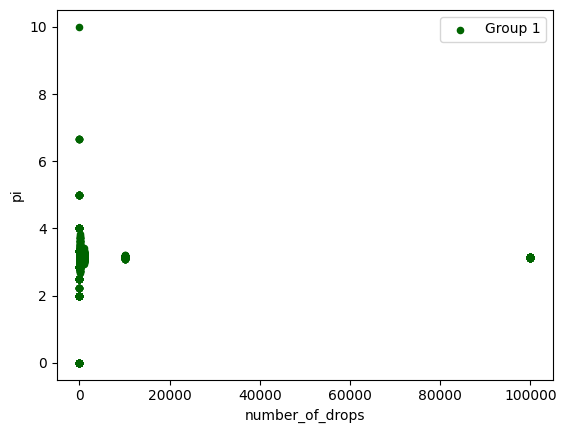

In [141]:
df.plot.scatter(x="number_of_drops", y="pi", color="DarkGreen", label="Group 1")

pi    Axes(0.125,0.11;0.775x0.77)
dtype: object

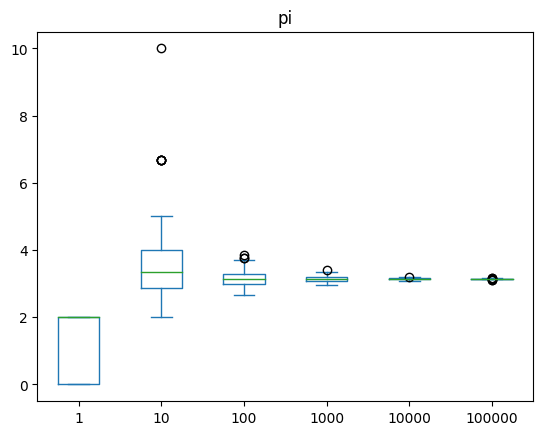

In [142]:
df.plot.box(by="number_of_drops", column=["pi"], grid=False)

In [143]:
# drop1_buttom = driver.find_element(By.ID, "buffonDrop1")
# drop1_buttom.click()